In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch.utils.data import Dataset, DataLoader

from dataloading import get_dataloader, stds, means

%matplotlib inline

classes = ['YOUNG', 'MIDDLE', 'OLD']

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

train_df['ID'] = './data/train/' + train_df['ID']
test_df['ID'] = './data/test/' + test_df['ID']

train_normal_dl = get_dataloader(train_df, batch_size=25, include_labels=True, augment_prob=0., num_workers=4)
train_transformed_dl = get_dataloader(train_df, batch_size=25, include_labels=True, augment_prob=1., num_workers=4)
test_dl = get_dataloader(test_df, batch_size=25, include_labels=False, augment_prob=.0, num_workers=4)

/home/vincent/miniconda3/envs/dl/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1826: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/vincent/miniconda3/envs/dl/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1800: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


<AxesSubplot:>

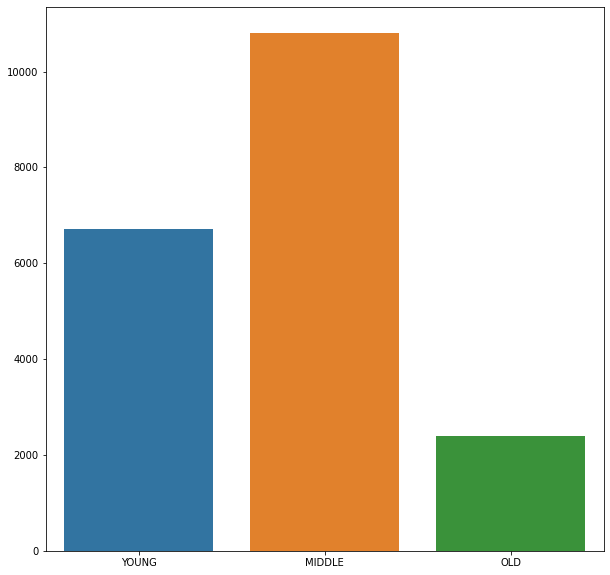

In [2]:
plt.figure(figsize=(10, 10))
sns.barplot(x=classes, y=[(train_df['Class'] == c).sum() for c in classes])

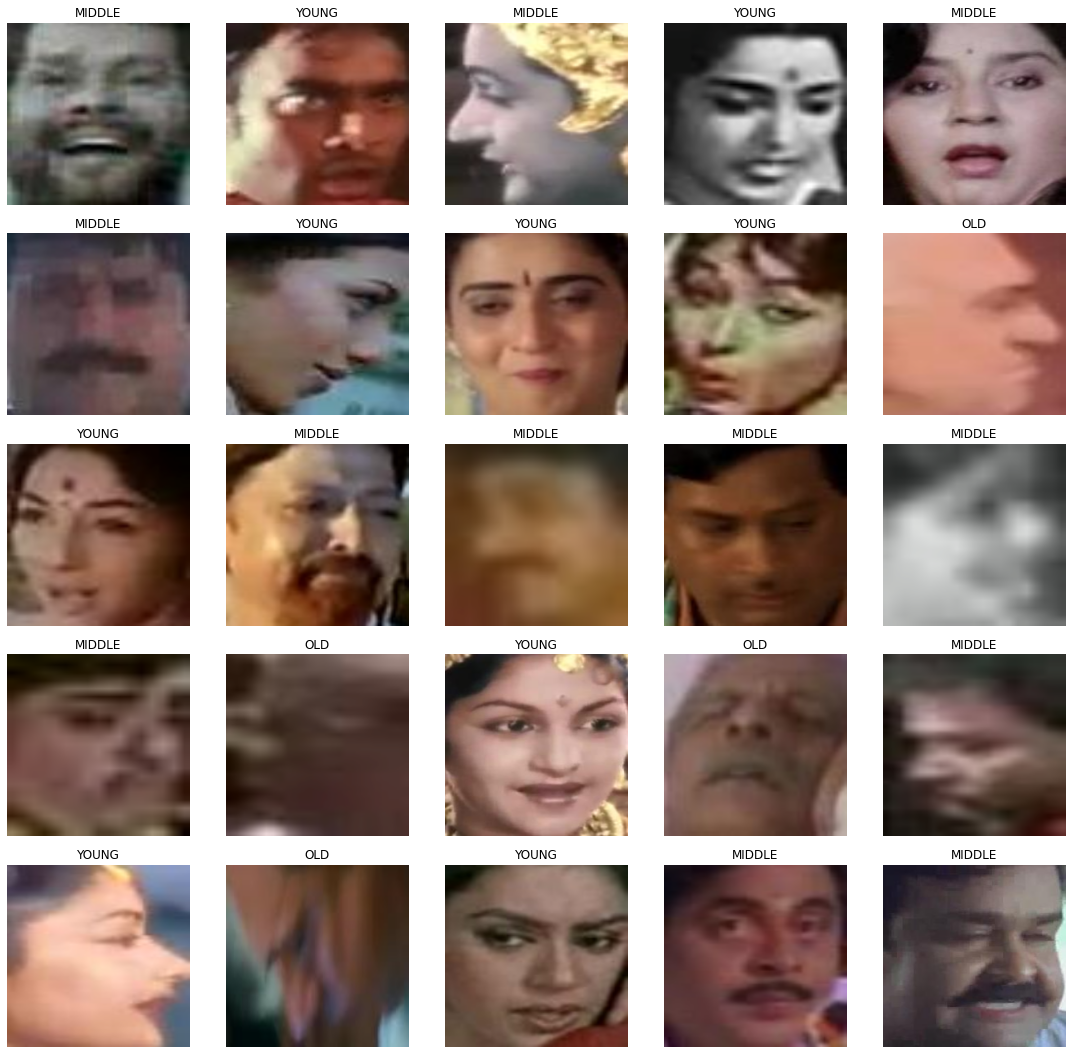

In [3]:
plt.figure(figsize=(15, 15))
bunch = next(iter(train_normal_dl))
images, labels = bunch
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    img = images[i].permute(1, 2, 0) * stds + means
    img[img < 0] = 0
    img[img > 1] = 1
    plt.imshow(img)
    plt.tight_layout()
    plt.title(classes[torch.argmax(labels[i])])
    plt.axis("off")

[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)


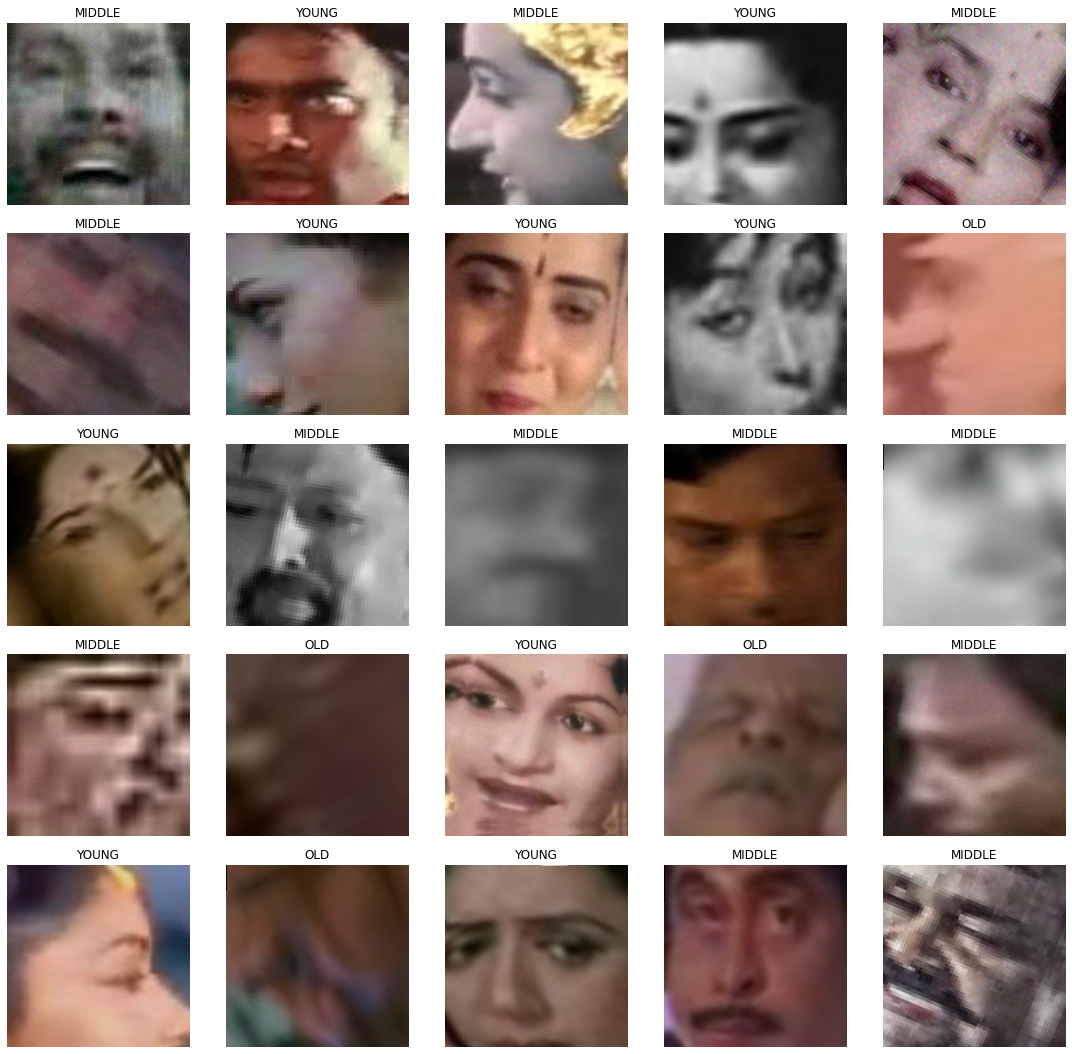

In [4]:
#train_transformed_dl = get_dataloader(train_df, batch_size=25, include_labels=True, augment=True, num_workers=4)

classes = ['YOUNG', 'MIDDLE', 'OLD']

plt.figure(figsize=(15, 15))
bunch = next(iter(train_transformed_dl))
images, labels = bunch
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    img = images[i].permute(1, 2, 0) * stds + means
    img[img < 0] = 0
    img[img > 1] = 1
    plt.imshow(img)
    plt.tight_layout()
    plt.title(classes[torch.argmax(labels[i])])
    plt.axis("off")

In [ ]:
classes = ['YOUNG', 'MIDDLE', 'OLD']

plt.figure(figsize=(15, 15))
bunch = next(iter(train_transformed_dl))
images, labels = bunch
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    img = images[i].permute(1, 2, 0) * stds + means
    img[img < 0] = 0
    img[img > 1] = 1
    plt.imshow(img)
    plt.tight_layout()
    plt.title(classes[torch.argmax(labels[i])])
    plt.axis("off")

[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)


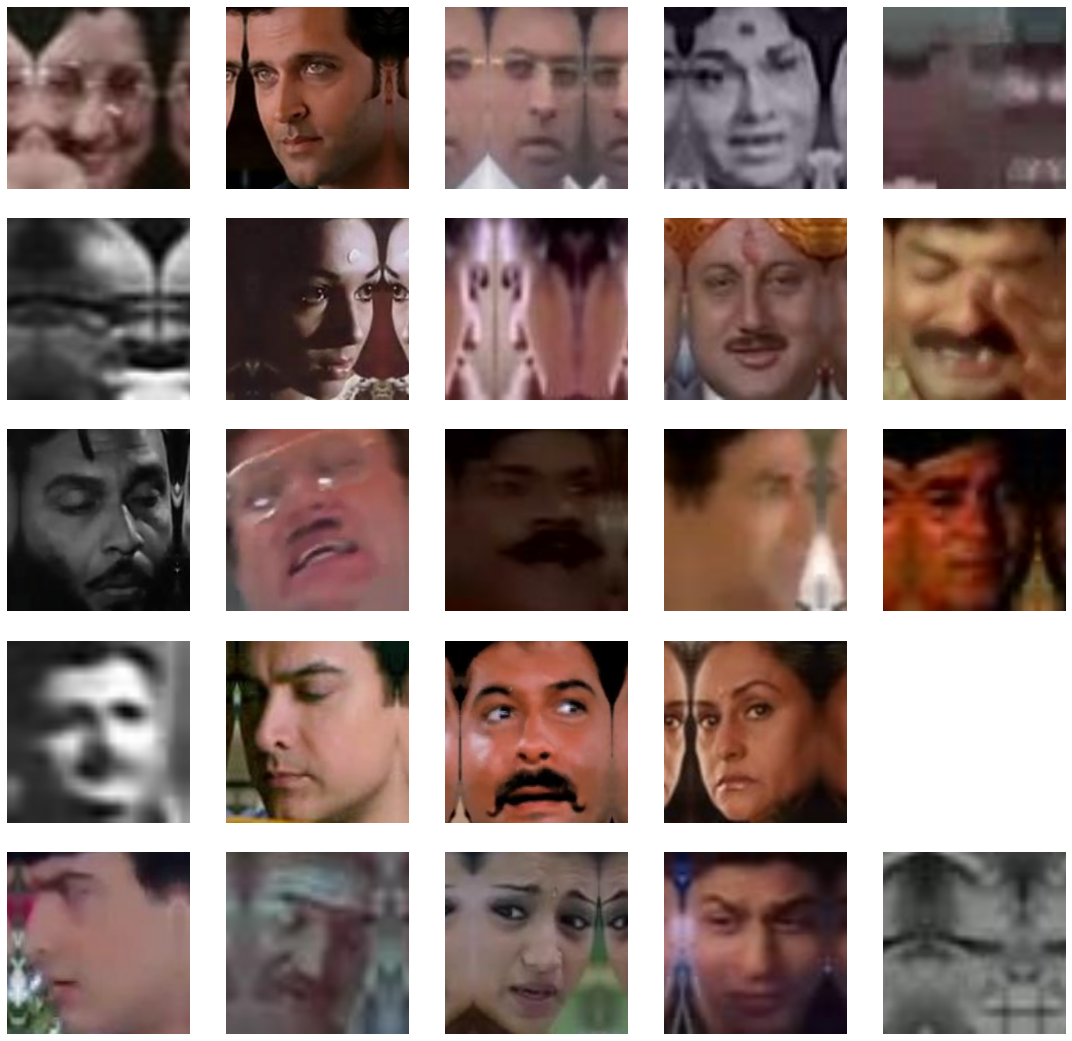

In [14]:
classes = ['YOUNG', 'MIDDLE', 'OLD']

plt.figure(figsize=(15, 15))
bunch = next(iter(test_dl))
images = bunch
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    img = images[i].permute(1, 2, 0) * stds + means
    img[img < 0] = 0
    img[img > 1] = 1
    plt.imshow(img)
    plt.tight_layout()
    plt.axis("off")